In [1]:
# Compile and import local pyrossgeo module
import os, sys
owd = os.getcwd()
os.chdir('../../../')
sys.path.insert(0,'../../../')
!sh local_setup.sh
os.chdir(owd)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyrossgeo

import datetime
import time

Compiling pyrossgeo/_simulation.pyx because it changed.
[1/1] Cythonizing pyrossgeo/_simulation.pyx
running build_ext
building 'pyrossgeo._simulation' extension
gcc -pthread -B /home/lukas/anaconda3/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/lukas/anaconda3/include/python3.7m -c pyrossgeo/_simulation.c -o build/temp.linux-x86_64-3.7/pyrossgeo/_simulation.o
In file included from /usr/include/numpy/ndarraytypes.h:1809:0,
                 from /usr/include/numpy/ndarrayobject.h:18,
                 from /usr/include/numpy/arrayobject.h:4,
                 from pyrossgeo/_simulation.c:611:
/usr/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^~~~~~~
pyrossgeo/_simulation.c: In function ‘__pyx_f_9pyrossgeo_11_simulation_simulate’:
pyrossgeo/_simu

Simulation parameters

In [2]:
model_path = 'model.json' 
commuter_networks_path = 'commuter_networks.csv'
node_parameters_path = 'node_parameters.csv'
cnode_parameters_path = 'cnode_parameters.csv' 
contact_matrices_path = 'contact_matrices.json' 
node_cmatrices_path = 'node_cmatrices.csv' 
cnode_cmatrices_path = 'cnode_cmatrices.csv' 
node_positions_path = 'node_positions.csv' 
node_populations_path = 'node_populations.csv' 

Simulation settings

In [3]:
t_start = 0
t_end = 24*60*200

_, dts = pyrossgeo.utils.get_dt_schedule([
    (0,  1*60),
    (6*60,  1),
    (10*60, 2*60),
    (16*60, 1),
    (19*60, 2*60)
], end_time=24*60)

Run simulation

In [4]:
sim = pyrossgeo.Simulation()

X_state = sim.initialize(model_path, commuter_networks_path,
                            node_parameters_path, cnode_parameters_path,
                            contact_matrices_path, node_cmatrices_path, cnode_cmatrices_path,
                            node_populations_path)

start_time = time.time()
dX_state = np.zeros(X_state.size)
sim_data = sim.simulate(X_state, t_start, t_end, dts, steps_per_save=1)
end_time = time.time()
sim_time = (end_time - start_time)/(60*60)
print("Simulation complete. Run-time (h): %s" % sim_time)

ts, node_data, cnode_data, location_data, community_data, network_data = pyrossgeo.utils.get_simulation_data(sim_data)

ts_days = ts / (24*60)
ts_hours = ts / 60

Simulation complete. Run-time (h): 5.80494933658176e-05


## Plot data

/home/lukas/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


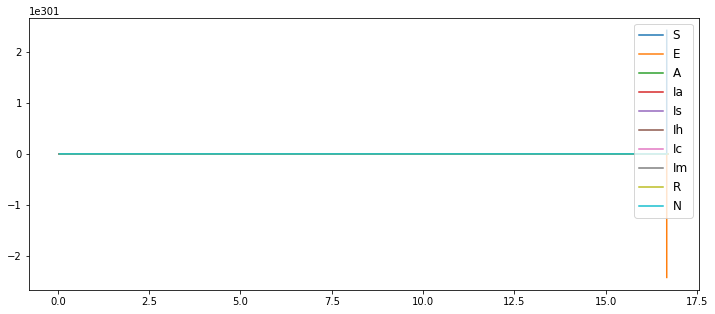

In [5]:
plt.figure( figsize=(12,5) )

S = np.sum(network_data[:,:,0], axis=1)
E = np.sum(network_data[:,:,1], axis=1)
A = np.sum(network_data[:,:,2], axis=1)
Ia = np.sum(network_data[:,:,3], axis=1)
Is = np.sum(network_data[:,:,4], axis=1)
Ih = np.sum(network_data[:,:,5], axis=1)
Ic = np.sum(network_data[:,:,6], axis=1)
Im = np.sum(network_data[:,:,7], axis=1)
R = np.sum(network_data[:,:,8], axis=1)
N = np.sum(network_data[:,:,:], axis=(1,2))

ts_days2 = ts_days - 24*3
s = (ts_days2 > 0) *  (ts_days2 < 20000)



plt.plot(ts_days2[s], S[s], label="S")
plt.plot(ts_days2[s], E[s], label="E")
plt.plot(ts_days2[s], A[s], label="A")
plt.plot(ts_days2[s], Ia[s], label="Ia")
plt.plot(ts_days2[s], Is[s], label="Is")
plt.plot(ts_days2[s], Ih[s], label="Ih")
plt.plot(ts_days2[s], Ic[s], label="Ic")
plt.plot(ts_days2[s], Im[s], label="Im")
plt.plot(ts_days2[s], R[s], label="R")
plt.plot(ts_days2[s], N[s], label="N")

plt.legend(loc='upper right', fontsize=12)

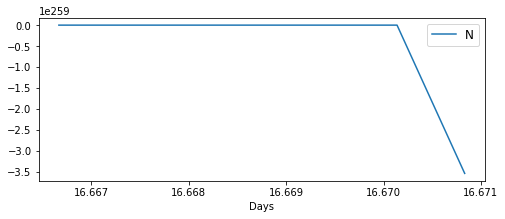

In [6]:
plt.figure( figsize=(8,3) )

loc = 0

S = np.sum(location_data[:,:,0,loc], axis=1)
E = np.sum(location_data[:,:,1,loc], axis=1)
A = np.sum(location_data[:,:,2,loc], axis=1)
Ia = np.sum(location_data[:,:,3,loc], axis=1)
Is = np.sum(location_data[:,:,4,loc], axis=1)
Ih = np.sum(location_data[:,:,5,loc], axis=1)
Ic = np.sum(location_data[:,:,6,loc], axis=1)
Im = np.sum(location_data[:,:,7,loc], axis=1)
R = np.sum(location_data[:,:,8,loc], axis=1)
N = np.sum(location_data[:,:,:,loc], axis=(1,2))

ts_days2 = ts_days - 24*3
s = (ts_days2 > 16.66) *  (ts_days2 < 100)

#plt.plot(ts_days[s], S[s], label="S")
#plt.plot(ts_days[s], E[s], label="E")
#plt.plot(ts_days[s], A[s], label="A")
#plt.plot(ts_days[s], I[s], label="I")
#plt.plot(ts_days[s], R[s], label="R")
plt.plot(ts_days2[s], N[s], label="N")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')
plt.show()

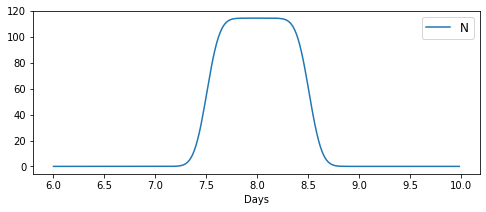

In [7]:
plt.figure( figsize=(8,3) )

home = 0
fro = 0
to = 1

S = np.sum(cnode_data[home,fro,to][:,:,0], axis=1)
E = np.sum(cnode_data[home,fro,to][:,:,1], axis=1)
A = np.sum(cnode_data[home,fro,to][:,:,2], axis=1)
Ia = np.sum(cnode_data[home,fro,to][:,:,3], axis=1)
Is = np.sum(cnode_data[home,fro,to][:,:,4], axis=1)
Ih = np.sum(cnode_data[home,fro,to][:,:,5], axis=1)
Ic = np.sum(cnode_data[home,fro,to][:,:,6], axis=1)
Im = np.sum(cnode_data[home,fro,to][:,:,7], axis=1)
R = np.sum(cnode_data[home,fro,to][:,:,8], axis=1)
N = np.sum(cnode_data[home,fro,to][:,:,:], axis=(1,2))

ts_hours2 = ts_hours
ts_hours2 =  ts_hours2 - 88*24
s = (ts_hours2 > 5) *  (ts_hours2 < 10)
#ts_hours2 =  ts_hours2 + 88*24

#plt.plot(ts_hours[s], S[s], label="S")
#plt.plot(ts_hours[s], E[s], label="E")
#plt.plot(ts_hours[s], A[s], label="A")
#plt.plot(ts_hours[s], I[s], label="I")
#plt.plot(ts_hours[s], R[s], label="R")
plt.plot(ts_hours2[s], N[s], label="N")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')
plt.show()

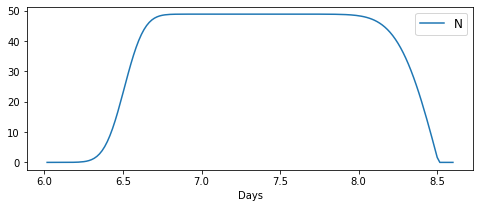

In [8]:
plt.figure( figsize=(8,3) )

home = 1
fro = 1
to = 0

S = np.sum(cnode_data[home,fro,to][:,:,0], axis=1)
E = np.sum(cnode_data[home,fro,to][:,:,1], axis=1)
A = np.sum(cnode_data[home,fro,to][:,:,2], axis=1)
Ia = np.sum(cnode_data[home,fro,to][:,:,3], axis=1)
Is = np.sum(cnode_data[home,fro,to][:,:,4], axis=1)
Ih = np.sum(cnode_data[home,fro,to][:,:,5], axis=1)
Ic = np.sum(cnode_data[home,fro,to][:,:,6], axis=1)
Im = np.sum(cnode_data[home,fro,to][:,:,7], axis=1)
R = np.sum(cnode_data[home,fro,to][:,:,8], axis=1)
N = np.sum(cnode_data[home,fro,to][:,:,:], axis=(1,2))
ts_hours2 = ts_hours
s = (ts_hours2 > 2120) *  (ts_hours2 < 2122)
ts_hours2 =  ts_hours2 - 88*24
s = (ts_hours2 > 6) *  (ts_hours2 < 8.6)
#ts_hours2 =  ts_hours2 + 88*24

#plt.plot(ts_hours2[s], S[s], label="S")
#plt.plot(ts_hours2[s], E[s], label="E")
#plt.plot(ts_hours2[s], A[s], label="I")
#plt.plot(ts_hours2[s], Is[s], label="I")
#plt.plot(ts_hours2[s], R[s], label="R")
plt.plot(ts_hours2[s], N[s], label="N")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')
plt.show()

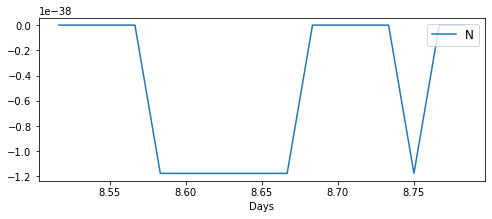

In [53]:
plt.figure( figsize=(8,3) )

home = 1
fro = 1
to = 0

S = np.sum(cnode_data[home,fro,to][:,:,0], axis=1)
E = np.sum(cnode_data[home,fro,to][:,:,1], axis=1)
A = np.sum(cnode_data[home,fro,to][:,:,2], axis=1)
Ia = np.sum(cnode_data[home,fro,to][:,:,3], axis=1)
Is = np.sum(cnode_data[home,fro,to][:,:,4], axis=1)
Ih = np.sum(cnode_data[home,fro,to][:,:,5], axis=1)
Ic = np.sum(cnode_data[home,fro,to][:,:,6], axis=1)
Im = np.sum(cnode_data[home,fro,to][:,:,7], axis=1)
R = np.sum(cnode_data[home,fro,to][:,:,8], axis=1)
N = np.sum(cnode_data[home,fro,to][:,:,:], axis=(1,2))
ts_hours2 = ts_hours
s = (ts_hours2 > 2120) *  (ts_hours2 < 2122)
ts_hours2 =  ts_hours2 - 88*24
s = (ts_hours2 > 8.5) *  (ts_hours2 < 8.8)
#ts_hours2 =  ts_hours2 + 88*24

#plt.plot(ts_hours2[s], S[s], label="S")
#plt.plot(ts_hours2[s], E[s], label="E")
#plt.plot(ts_hours2[s], A[s], label="I")
#plt.plot(ts_hours2[s], Is[s], label="I")
#plt.plot(ts_hours2[s], R[s], label="R")
plt.plot(ts_hours2[s], N[s], label="N")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')
plt.show()

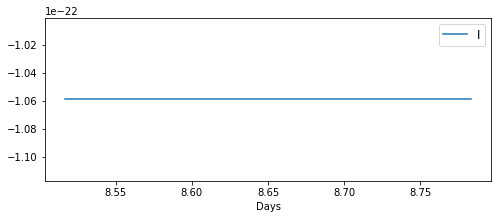

In [64]:
plt.figure( figsize=(8,3) )

home = 1
fro = 1
to = 0
age = 0

S = cnode_data[home,fro,to][:,age,0]
E = cnode_data[home,fro,to][:,age,1]
A = cnode_data[home,fro,to][:,age,2]
Ia = cnode_data[home,fro,to][:,age,3]
Is = cnode_data[home,fro,to][:,age,4]
Ih = cnode_data[home,fro,to][:,age,5]
Ic = cnode_data[home,fro,to][:,age,6]
Im = cnode_data[home,fro,to][:,age,7]
R = cnode_data[home,fro,to][:,age,8]
N = np.sum(cnode_data[home,fro,to][:,age,:], axis=1)
           
ts_hours2 = ts_hours
s = (ts_hours2 > 2120) *  (ts_hours2 < 2122)
ts_hours2 =  ts_hours2 - 88*24
s = (ts_hours2 > 8.5) *  (ts_hours2 < 8.8)
#ts_hours2 =  ts_hours2 + 88*24

#plt.plot(ts_hours2[s], S[s], label="S")
#plt.plot(ts_hours2[s], E[s], label="E")
#plt.plot(ts_hours2[s], A[s], label="I")
plt.plot(ts_hours2[s], Is[s], label="I")
#plt.plot(ts_hours2[s], R[s], label="R")
#plt.plot(ts_hours2[s], N[s], label="N")

plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Days')
plt.show()